In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import WordNetLemmatizer

from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df_recipes = pd.read_csv("recipes_imputed_manual.csv")

In [8]:
df_recipes['spice_level'].value_counts()

No Spice    177
Spicy        43
Mild         40
Name: spice_level, dtype: int64

In [24]:
cat_cols = [
    "country",
    "country_secondary",
    "dish_category",
    "dish_type",
    "diet_type",
    "carbohydrate_base",
    "carbohydrate_category",
    "protein",
    "protein_cut",
    "protein_type"
]

In [11]:
df_recipes['combined'] = df_recipes[cat_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [17]:
def preprocess_text(document):
    """
    Remove unwanted characters from text.
    """

    en_stop = set(nltk.corpus.stopwords.words("english"))

    document = str(document)
    document = "".join([i for i in document if not i.isdigit()])

    # Remove all the special characters
    document = re.sub(r"\W", " ", str(document))

    # remove all single characters
    document = re.sub(r"\s+[a-zA-Z]\s+", " ", document)

    # Remove single characters from the start
    document = re.sub(r"\^[a-zA-Z]\s+", " ", document)

    # Substituting multiple spaces with single space
    document = re.sub(r"\s+", " ", document, flags=re.I)

    # Removing prefixed "b"
    document = re.sub(r"^b\s+", "", document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization

    stemmer = WordNetLemmatizer()
    tokens = document.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [word for word in tokens if len(word) > 1]

    preprocessed_text = " ".join(tokens)
    return preprocessed_text

df_recipes['combined'] = df_recipes['combined'].apply(preprocess_text)

In [19]:
df_recipes['combined']

0      india india stove top bowl food curry fish bas...
1      italy italy protein veg meat side veg meat whi...
2      thailand thailand stove top bowl food curry ve...
3      great britain great britain protein veg fish s...
4      tunisia tunisia protein veg egg dish vegetaria...
                             ...                        
255    cuba cuba finger food sandwich meat ciabatta b...
256    italy italy stove top bowl food pasta fish whi...
257    united state united state america usa oven pas...
258    italy italy stove top bowl food risotto fish r...
259    spain spain stove top bowl food stew meat bagu...
Name: combined, Length: 260, dtype: object

In [22]:
df_recipes['word_count'] = df_recipes['combined'].str.split().apply(len)

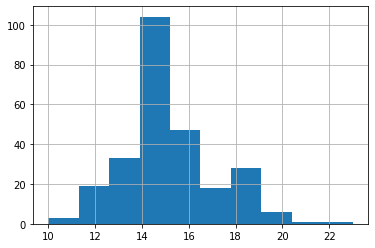

In [26]:
df_recipes['word_count'].hist()